# [Test Technique 2] - @Elouan RAYMOND

## Consignes

L’objectif est de développer **un modèle performant** pour prédire la **variable Output** en fonction des **autres variables pertinentes**. La plupart des variables ont un nom décrivant l’information contenue.

 

**Quelques informations :**

* Les variables finissant en _M : variables calculées au mois M
* Les variables finissant en _MY : variables calculées au mois M-Y
* Les variables finissant en _XM : variables calculées sur les mois M-X au mois M 



# Sommaire

> Je vais présenter ici de façon succinte l'organisation que j'ai adopté pour mon analyse et le cheminement. 

**Progression**

[Lecture du fichier](#1.-Lecture-du-fichier-&-Reformattages)
<br>

* Il faut tout d'abord charger le jeu de données correctement et reformater certaines données donc la lecture aurait pu échouer.

[Premier exploration du dataset](#1.2---Répartition-des-données-et-outliers)
<br>

* Afficher les  variables du dataset, afin de voir si certaines données doivent être filtrés (outliers qui ne feraient pas sens notamment)

[Seconde Exploration du dataset](#2.-Analyse-des-données)
)
* [Donner du sens aux variables, analyser les corrélations](#2.1-Analyse-des-features-&-output) 
* [Analyser l'output et donner des pistes pour le modèle](#Analyse-de-[Output])

[Réduction du nombre de variables](#3.-Analyse-en-Composante-Principale)

* Réduire le nombre de variables afin de mener une analyse plus pertinente 
[Choix de deux modèles d'apprentissage]

* Choix des modèles 
* Choix des métriques 
* Objectifs

[$1^{er}$ modèle d'apprentissage supervisé]

* Optimisation des hyperparamètres
* Calcul des métriques 

[$2^{nd}$ modèle d'apprentissage supervisé]

* Optimisation des hyperparamètres
* Calcul des métriques 

[Conclusion]

* Retour sur l'objectif
* Choix du modèle

### Librairies pour l'analyse

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

# 1. Lecture du fichier & Reformattages
## Chargement des données

In [2]:
df = pd.read_csv('Dataset_test_ILB.csv',encoding="latin1",sep=';',decimal=',')
# Encodage latin1 car le fichier n'est pas encodé en UTF8, selection de "," en séparateur décimal

## 1.1  Analyse du format

> L'objectif est de s'assurer ici que la lecture du fichier a été réussie et de reformater si necessaire certaines données.

In [3]:
df.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,"4715,49819",732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,"6584,320922",1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,"-7792,256696",34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,2277.193995,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,"6118,791869",1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,8280.325647,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,"-4266,843489",27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,59977.521970,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


In [4]:
df.shape

(3015, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3015 non-null   int64  
 1   Nombres_adultes                       3005 non-null   float64
 2   Nombre_personnes_foyer                3006 non-null   float64
 3   Age_2eme_personne                     3013 non-null   float64
 4   Note_credit                           3010 non-null   float64
 5   Encours_credit                        2993 non-null   object 
 6   ID_PP                                 3008 non-null   object 
 7   Encours_credit_habitat                3011 non-null   float64
 8   Montant_flux_crediteur_M1             3011 non-null   float64
 9   Montant_obligations                   3011 non-null   float64
 10  Montant_operation_crediteur_DAV_M1    3002 non-null   float64
 11  Montant_operation

### Problème de conversion sur Encours_credit
La majorité des colonnes qui contiennt des float ont bien été converties, sauf **Encours_credit**
> **Encours_credit**: Argent qui a été prêté mais qui n'a pas encore été remboursé.

### [Encours_credit]  - Reformattage

Nous allons donc reformater cette colonne de valeur afin de pouvoir mener des analyses

In [6]:
df.Encours_credit[14:34]

14    PAS DENCOURS
15    -4648,965858
16     9654,794858
17    -14351,44645
18    -1636,208879
19    -9442,465683
20    -8047,237148
21    -2059,018592
22     3981,916098
23     -2517,34467
24    -6878,210721
25     182,6623636
26    -5287,245058
27    -10360,55858
28      11300,4433
29    -3482,976268
30     10768,15036
31    -18316,31167
32     2641,386869
33             NaN
Name: Encours_credit, dtype: object

<br>
On comprend mieux pourquoi la conversion n'a pas pu se faire: il faut prendre en compte les personnes qui n'ont pas d'encours credit (PAS DENCOURS), ou pour lesquels on ne connaît pas l'information (NaN)

#### Formattage d'encours_credit

Pour que l'encours credit garde son sens, je propose de séparer cette colonne en deux colonnes : 

| Encours_credit_bool             | Encours_credit_value |
| ------------------------------- | -------------------- |
| True                            | -1151                |
| False (Remplace 'PAS DENCOURS') | NaN                  |



In [7]:
"""Création de deux array encours_credit_bool & encours_credit_value """
def create_encours_credit_bool_and_value(df):
    encours_credit = df['Encours_credit'].tolist()
    """Fonction qui construit les deux array évoqués ci-dessus"""
    encours_credit_bool = [True]*len(encours_credit)
    encours_credit_value =[np.nan]*len(encours_credit)
    for (i,encours) in enumerate(encours_credit): 
        """Parcourt la liste encours_credit : encours est un str pour le moment"""
        if encours =="PAS DENCOURS":
            encours_credit_bool[i] = False
        else : 
            """Il y a bien un encours, il va falloir convertir le str en float : attention sep ',' """
            try :
                """Il se peut que encours soit un NaN c'est pourquoi on utilise try & except"""
                encours_float = '.'.join(encours.split(',')) # Utilisation de split pour la conversion
                encours_float = float(encours_float)
                encours_credit_value[i] = encours_float
            except : 
                encours_credit_bool[i] = np.nan
                
    """On peut renvoyer les array"""
    return(encours_credit_bool,encours_credit_value)

In [8]:
encours_credit_bool,encours_credit_values = create_encours_credit_bool_and_value(df)

**On vérifie si la structure est conforme à ce que nous avions envisagé**

In [9]:
encours = pd.DataFrame(zip(encours_credit_bool,encours_credit_values),columns=['Encours_credit_bool','Encours_credit_value'])

In [10]:
encours.iloc[13:34,:]
## Le reformattage a bien fonctionné

,Encours_credit_bool,Encours_credit_value
13,True,5286.493638
14,False,NaN
15,True,-4648.965858
16,True,9654.794858
17,True,-14351.446450
18,True,-1636.208879
19,True,-9442.465683
20,True,-8047.237148
21,True,-2059.018592
22,True,3981.916098


### Modification d'encours credit dans le dataframe

In [11]:
df1 = df.copy()

On va insérer notre notre dataframe encours à la place de 'Encours_credit'

In [12]:
df1.iloc[:2,:5]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit
0,2911,2.057430,2.070880,91.042848,0.177448
1,1398,2.060715,2.193722,90.715413,-0.062708


In [13]:
encours.head(2)

,Encours_credit_bool,Encours_credit_value
0,True,4715.498190
1,True,6584.320922


In [14]:
df1.iloc[:2,6:]

,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,Montant_operation_crediteur_DAV_M,Montant_operation_debiteur_DAV_M1,Montant_operation_debiteur_DAV_M,Montant_retrait_carte_M,Montant_retrait_carte_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,4498.397638,7930.203493,4997.109487,9488.923224,31.338746,25.008051,...,0.160537,0.094456,262736.7614,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,1890.630239,-1655.250533,1669.661800,1494.971252,-0.191790,-3.399387,...,-0.172851,-0.170338,157962.6467,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX


In [15]:
def concat_df_encours(df,encours):
    """On sépare df en deux parties, encours_credit étant la 6 colonne de df"""
    part1 = df.iloc[:,:5]
    part2 = df.iloc[:,6:]
    df1 = pd.concat([part1,encours],axis=1)
    df1 = pd.concat([df1,part2],axis=1)
    return(df1)

In [16]:
df1 = concat_df_encours(df,encours)

In [17]:
df1.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,True,4715.498190,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,True,6584.320922,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,True,-7792.256696,34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,True,6118.791869,1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,True,-4266.843489,27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


**[Modification de encours credit]**
> A l'issue de cette première partie nous avons pu retravailler le dataframe et notamment la colonne "Encours_credit" afin de simplifier l'analyse

## 1.2 - Répartition des données et outliers

##### Maintenant que nous avons pu charger correctement le datasets, il faut regarder s'il y a des anomalies dans le jeu de données

In [18]:
df = df1
df.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3015.000000,3005.000000,3006.000000,3.013000e+03,3010.000000,2970.000000,3011.000000,3011.000000,3.011000e+03,3002.000000,...,3008.000000,3011.000000,3010.000000,3.009000e+03,2994.000000,2994.000000,2996.000000,3006.000000,3009.000000,3008.00000
mean,1505.492206,1.651430,2.139211,2.247984e+03,4.087619,67733.356217,66183.088854,3430.032454,1.057915e+04,8039.496539,...,25.181340,0.141723,0.150699,1.941102e+05,21.343223,26.634469,33.320717,102.902545,4069.769709,129798.31574
std,869.645684,3.073339,1.130802,7.714272e+04,3.901568,97274.363255,97054.712799,12601.220620,3.639671e+04,34477.188935,...,127.211080,0.815417,0.976184,2.198428e+06,42.840104,57.345026,74.547646,151.341643,17200.093454,50784.99592
min,0.000000,-45.154000,0.628834,-1.014041e+01,-1.243272,-35268.964050,-35446.980780,-12073.545780,-1.111274e+04,-7999.359456,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.56655
25%,752.500000,1.023015,1.099215,1.193945e+00,0.060387,-49.319006,-1058.635777,-355.231937,1.663585e+02,8.222620,...,-8.283941,-0.045147,-0.050422,-4.443938e+04,0.940546,1.122001,1.411483,7.331611,494.447401,124794.80720
50%,1506.000000,1.958080,1.979002,3.295269e+01,6.071823,15300.678100,12956.683190,2173.796979,4.705268e+03,2600.692478,...,1.666568,0.010977,0.006696,7.685730e+04,6.721483,8.460031,10.834154,57.338650,1963.882364,129489.98350
75%,2259.500000,2.011098,2.634577,4.842538e+01,6.646759,122237.835025,121627.982600,5120.094253,9.941821e+03,5664.498512,...,12.740980,0.066336,0.073643,2.001135e+05,23.635741,29.717792,36.966530,150.928176,3801.005236,134389.96840
max,2999.000000,157.000000,8.029462,3.651695e+06,14.147356,779946.571100,779588.699300,397248.044000,1.003670e+06,462366.112900,...,2406.320620,17.061262,23.098115,1.001995e+08,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.89020


#### Analyse skewnesss & kurtosis

Le but est d'analyser la répartition et la symétrie des données pour voir si il y a des outliers

In [19]:
df.skew()
#df.kurtosis()

ID                                      -0.003092
Nombres_adultes                         41.276719
Nombre_personnes_foyer                   1.183082
Age_2eme_personne                       40.209588
Note_credit                              0.346819
Encours_credit_bool                    -11.281211
Encours_credit_value                     1.749415
Encours_credit_habitat                   1.735483
Montant_flux_crediteur_M1               18.673586
Montant_obligations                     12.031500
Montant_operation_crediteur_DAV_M1       9.193942
Montant_operation_crediteur_DAV_M       10.888899
Montant_operation_debiteur_DAV_M1        9.139366
Montant_operation_debiteur_DAV_M         6.699842
Montant_retrait_carte_M                  6.679253
Montant_retrait_carte_M1                 7.778168
Nombre_retrait_carte_M1                 12.031966
Nombre_retrait_carte_M1,1               14.905489
Quantité_obligations                    36.016058
Nombre_connexion_appli_6M                6.132051


**Afin de se familiariser avec le dataset nous allons afficher chacune des composantes**

In [20]:
def plot_skew_kurt(df):
    subplot_pos =[121,122] ## Subplot 2 par ligne
    legends =['',''] # Pour stocker la legende de chaque plot de la ligne
    for (i,cols) in enumerate(df.skew().index[1:]):
        ## Selection de toutes les features sauf ID
        plt.subplot(subplot_pos[i%2])
        legend = f'{cols} - sk : {round(df.skew().values[i+1])} - kurt :{round(df.kurtosis().values[i+1])}'
        legends[i%2] = legend 
        plt.scatter(df.index,df[cols])
        if i%2==0: ## Fin de ligne on affiche
            print('  | '.join(legends))
            plt.subplots_adjust(right = 2)
            plt.show()

Nombres_adultes - sk : -1.0 - kurt :-2.0  | 


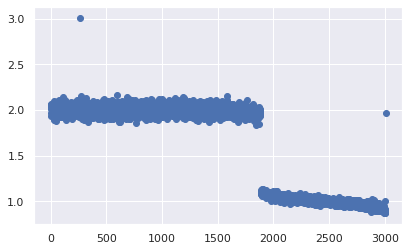

Age_2eme_personne - sk : 0.0 - kurt :-1.0  | Nombre_personnes_foyer - sk : 1.0 - kurt :1.0


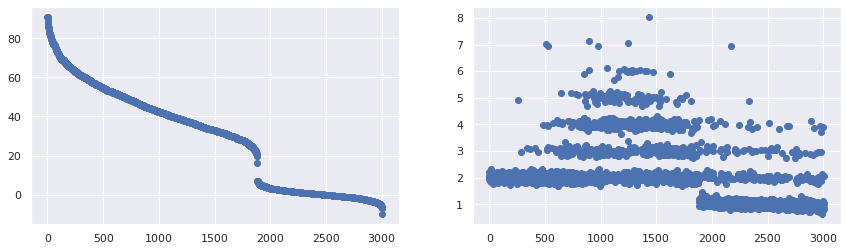

Encours_credit_bool - sk : -11.0 - kurt :125.0  | Note_credit - sk : 0.0 - kurt :-1.0


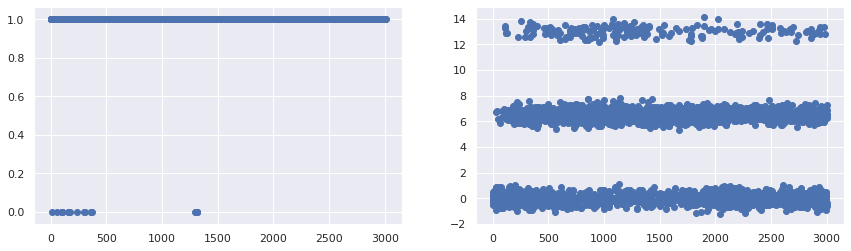

Encours_credit_habitat - sk : 2.0 - kurt :4.0  | Encours_credit_value - sk : 2.0 - kurt :4.0


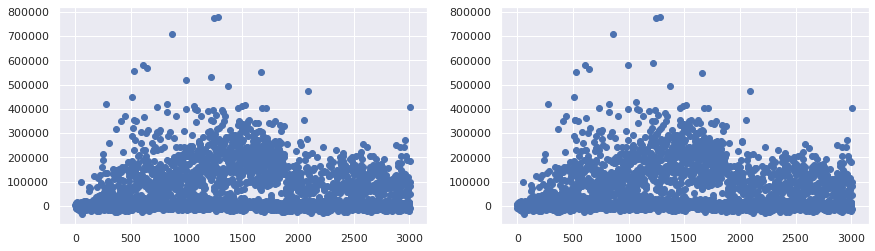

Montant_obligations - sk : 8.0 - kurt :95.0  | Montant_flux_crediteur_M1 - sk : 19.0 - kurt :482.0


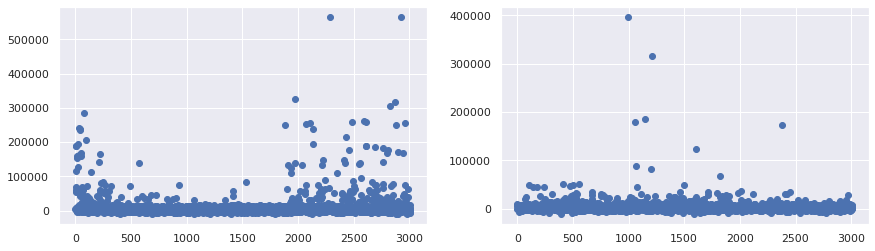

Montant_operation_crediteur_DAV_M - sk : 11.0 - kurt :172.0  | Montant_operation_crediteur_DAV_M1 - sk : 9.0 - kurt :97.0


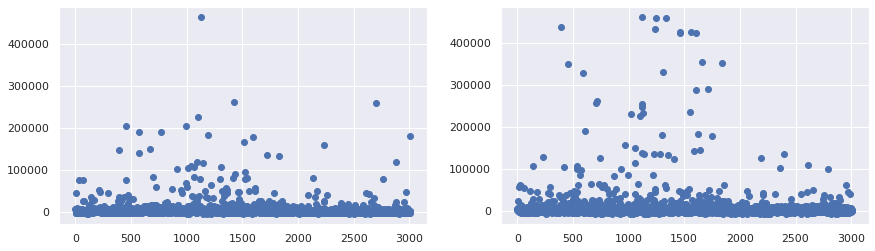

Montant_operation_debiteur_DAV_M - sk : 7.0 - kurt :51.0  | Montant_operation_debiteur_DAV_M1 - sk : 9.0 - kurt :97.0


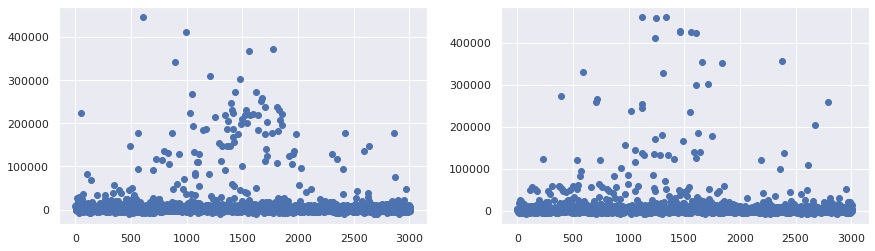

Montant_retrait_carte_M1 - sk : 8.0 - kurt :83.0  | Montant_retrait_carte_M - sk : 7.0 - kurt :53.0


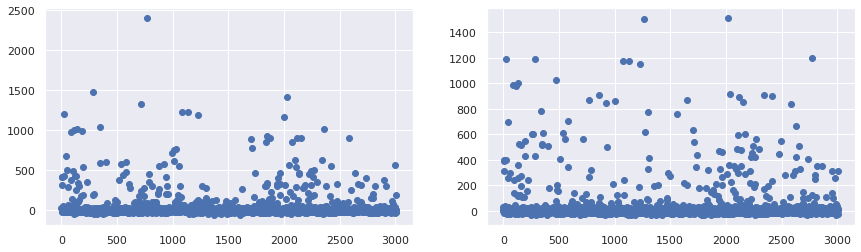

Nombre_retrait_carte_M1 - sk : 12.0 - kurt :201.0  | CSP - sk : -0.0 - kurt :-2.0


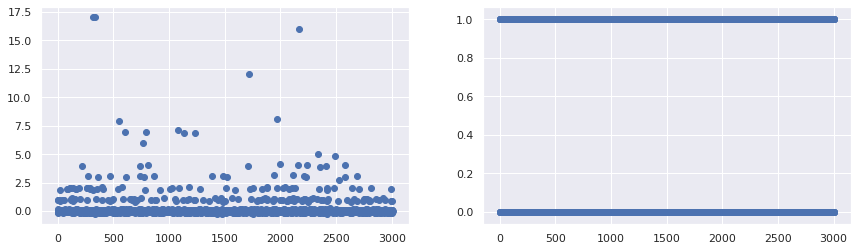

Quantité_obligations - sk : 27.0 - kurt :873.0  | Nombre_retrait_carte_M1,1 - sk : 15.0 - kurt :294.0


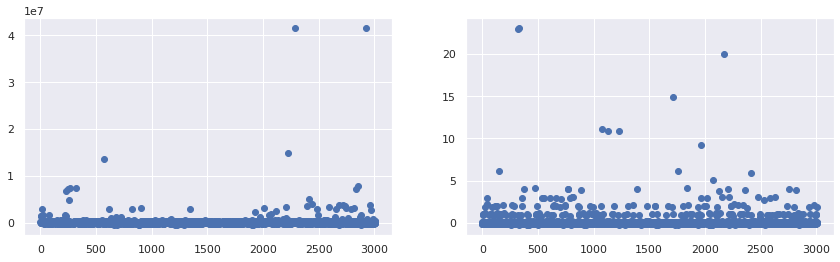

Nombre_de_connexion_appli_semaine_6M - sk : 9.0 - kurt :154.0  | Nombre_connexion_appli_6M - sk : 6.0 - kurt :76.0


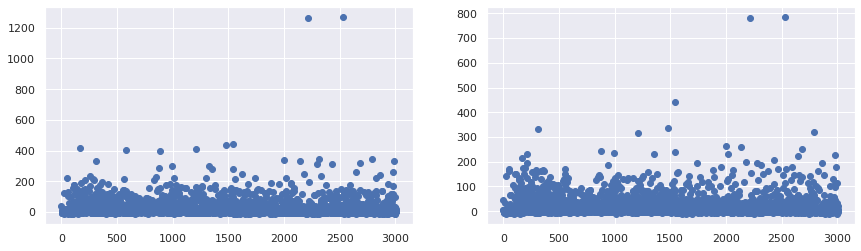

Duree_connexion_moyenne_6M - sk : 4.0 - kurt :31.0  | Nombre_connexion_site_6M - sk : 10.0 - kurt :184.0


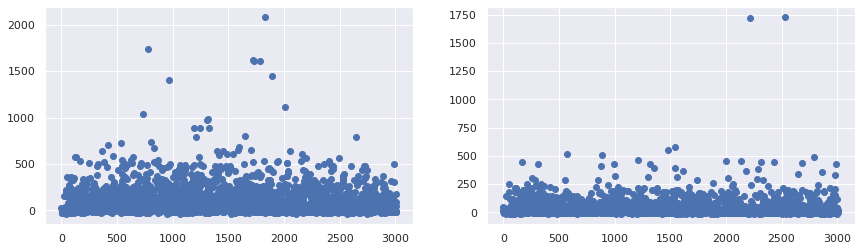

Montant_pret_banque - sk : 2.0 - kurt :21.0  | Montant_flux_crediteur_M - sk : 16.0 - kurt :287.0


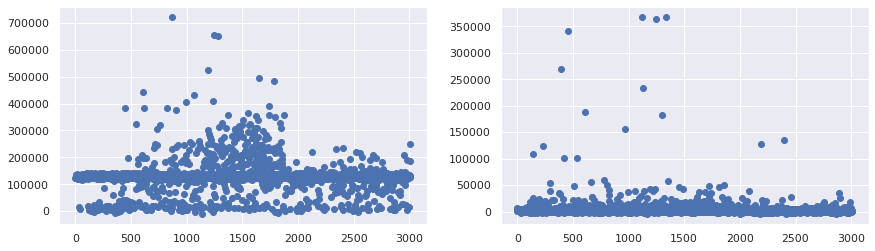

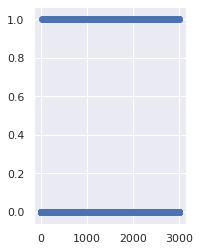

In [132]:
plot_skew_kurt(df) # Scatter plot de la variable & affichage sa skewness et de son kurtosis

### Enlever les outliers
On remarque **3 features** ont un **kurtosis & une skewness très élevé** - le plot confirme la présence d'**outliers**:

**Pour ces deux features, ils est nécessaire de se séparer de tous les outliers, car elles n'ont pas de sens, par exemple : max(Nombres_adultes) = 157, ce qui ne fait pas sens.**

* Nombres_adultes
* Age_2e_personne

**Pour cette feature, on va uniquement enlever le maximum (1 000 000)**
* Quantités_obligations

### Filtrer les outliers

In [22]:
"""Avec les paramètres suivants on peut : 
Enlever les outliers pour Nombres_adultes  >25 ou <0 (pas de nombre_adultes négatif)
Enlever les outliers au niveau de l'âge : >200
Quantité d'obligations : On enlève le max qui déforme le dataset et est beaucoup trop éloigné des autres valeurs
"""

outliers_filters = (df.Nombres_adultes>25)|(df.Nombres_adultes<0)|(df.Age_2eme_personne>200)|(df.Quantité_obligations==max(df.Quantité_obligations))

In [23]:
"""Voici les données que nous allons enlever du dataset"""
df[outliers_filters]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
13,1125,1.988612,1.996277,1.500000e+06,0.468081,True,5286.493638,dc5c0440a9a7fa6e56ef9c41ec30044dfc6aafe2,3887.092790,-728.100980,...,1.030981,1.119442,1.315948e+06,-1.117414,-0.988967,-0.885137,-21.857154,3629.066274,123788.7548,FAUX
20,2436,157.000000,2.207566,8.286753e+01,0.124294,True,-8047.237148,b9da2f10fa9da8a341c9270d22825508bb01c3aa,-7553.047311,2303.188415,...,0.028504,0.012999,-6.527436e+04,-6.175580,-5.440543,-6.487811,3.370448,1632.176481,129916.1813,VRAI
23,30,1.998692,1.870891,1.534521e+06,-0.327990,True,-2517.344670,c368cc66aff85ee21a1a90964c611b23d15a2e12,-2604.063097,2827.502265,...,-0.009947,-0.028837,1.891141e+06,93.231513,80.120497,100.353803,268.078651,4517.537171,136168.2920,FAUX
38,2763,-35.000000,1.833692,7.956678e+01,0.164459,True,-9726.573835,ddbf56d6a375013d611d93a608c862af27f376d0,-10332.358050,-795.964305,...,-0.039791,-0.034498,9.370660e+04,2.489446,0.090541,-0.143907,-13.595050,1542.499101,129448.9522,FAUX
45,2311,-45.154000,1.980447,7.860640e+01,-0.224071,True,-1361.812353,00c496dc805e6d74d21b803aaf0d5b3334faa349,-1421.340490,653.830813,...,0.934992,2.930379,7.564783e+04,3.631247,4.646773,4.737960,17.970802,4789.286357,135816.6949,FAUX
90,390,1.927201,1.774959,3.651695e+06,-0.462633,True,-4117.758621,01e45b8e536995696fd685d6e1f49bfc819168d4,-3146.248259,-1242.853205,...,0.107656,0.052591,1.136401e+05,29.385684,28.240021,31.809899,-18.751434,1116.904916,129835.9530,FAUX
164,808,2.037934,1.984801,6.773047e+01,-0.120481,True,-3012.301219,aca550f13c3627508b776a1b5a8a8876e65b04d7,-2753.502799,8897.974922,...,0.019288,0.008760,1.001995e+08,89.816645,80.038331,112.270599,374.607394,22950.805510,113190.3472,VRAI


In [24]:
outliers_index = df[outliers_filters].index #On garde les index des outliers

In [25]:
df1 = df.copy()

In [26]:
df1 = df[~df.index.isin(outliers_index)].reset_index(drop=True) # On met les outliers de côtés

### Après avoir filtré les outliers -  Nouvelle analyse skew & kurtosis

In [27]:
df1.shape

(3008, 28)

In [28]:
df.shape

(3015, 28)

In [29]:
df1.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3008.000000,2998.000000,2999.000000,3006.000000,3003.000000,2963.000000,3004.000000,3004.000000,3004.000000,2995.000000,...,3001.000000,3004.000000,3003.000000,3.002000e+03,2987.000000,2987.000000,2989.000000,2999.000000,3002.000000,3001.000000
mean,1505.716755,1.627001,2.139653,28.825561,4.097274,67901.304252,66345.274303,3434.058636,10129.304273,8036.715757,...,25.102147,0.141363,0.149698,1.600444e+05,21.322513,26.634380,33.317904,102.939389,4065.875676,129801.788927
std,869.290959,0.484844,1.132066,24.892164,3.900953,97327.508262,97109.294226,12614.628178,31365.482404,34510.351829,...,127.143296,0.816060,0.975823,1.228497e+06,42.843987,57.386837,74.600335,151.339618,17216.479346,50842.935701
min,0.000000,0.869316,0.628834,-10.140412,-1.243272,-35268.964050,-35446.980780,-12073.545780,-11112.742260,-7999.359456,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.566550
25%,752.750000,1.023053,1.098764,1.184886,0.061701,61.072253,-909.148867,-352.258920,160.153010,3.136097,...,-8.255494,-0.045272,-0.050706,-4.461642e+04,0.941826,1.125489,1.417528,7.422034,491.620936,124798.290300
50%,1506.500000,1.958061,1.978972,32.919935,6.073068,15415.914820,13019.576045,2175.508736,4688.742024,2600.379879,...,1.667738,0.010836,0.006588,7.683218e+04,6.726718,8.460611,10.838098,57.417767,1963.766421,129486.913900
75%,2258.250000,2.011032,2.744282,48.332106,6.651442,122706.730700,121855.129975,5122.783487,9931.201318,5659.847745,...,12.734430,0.066320,0.073626,1.997422e+05,23.594110,29.699475,36.884775,150.901409,3796.772909,134389.615800
max,2999.000000,3.006550,8.029462,91.042848,14.147356,779946.571100,779588.699300,397248.044000,565896.779800,462366.112900,...,2406.320620,17.061262,23.098115,4.163348e+07,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.890200


In [30]:
df1.skew()

ID                                      -0.003028
Nombres_adultes                         -0.505495
Nombre_personnes_foyer                   1.180729
Age_2eme_personne                        0.112854
Note_credit                              0.343199
Encours_credit_bool                    -11.267715
Encours_credit_value                     1.746434
Encours_credit_habitat                   1.732454
Montant_flux_crediteur_M1               18.656586
Montant_obligations                      8.234687
Montant_operation_crediteur_DAV_M1       9.188814
Montant_operation_crediteur_DAV_M       10.934636
Montant_operation_debiteur_DAV_M1        9.183713
Montant_operation_debiteur_DAV_M         6.607157
Montant_retrait_carte_M                  6.697234
Montant_retrait_carte_M1                 7.800375
Nombre_retrait_carte_M1                 12.032151
Nombre_retrait_carte_M1,1               14.951891
Quantité_obligations                    27.089111
Nombre_connexion_appli_6M                6.143452


Nombres_adultes - sk : -1.0 - kurt :-2.0  | 


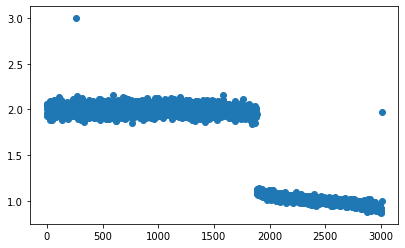

Age_2eme_personne - sk : 0.0 - kurt :-1.0  | Nombre_personnes_foyer - sk : 1.0 - kurt :1.0


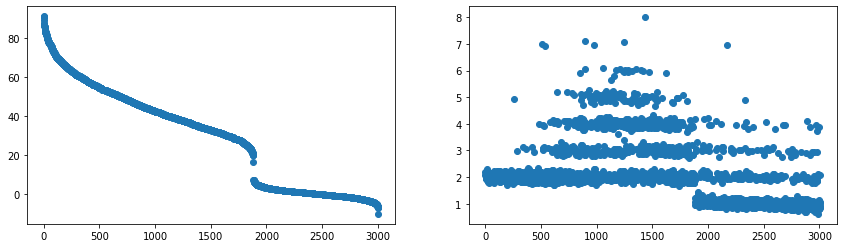

Encours_credit_bool - sk : -11.0 - kurt :125.0  | Note_credit - sk : 0.0 - kurt :-1.0


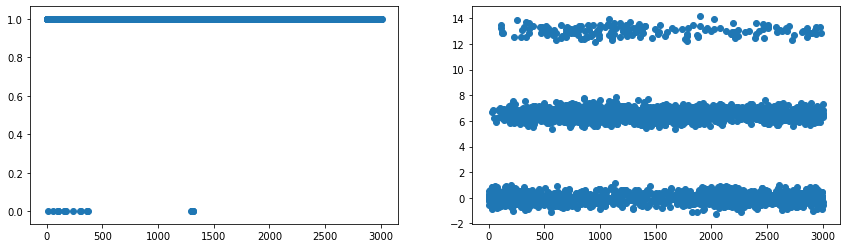

Encours_credit_habitat - sk : 2.0 - kurt :4.0  | Encours_credit_value - sk : 2.0 - kurt :4.0


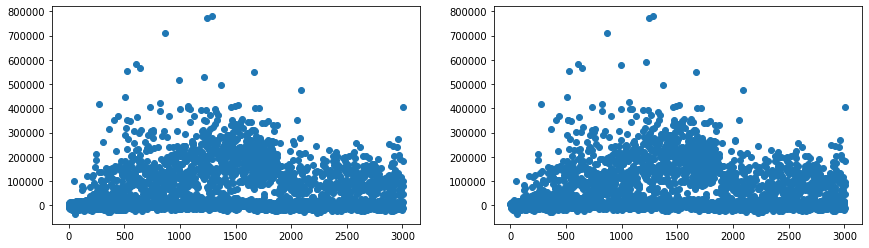

Montant_obligations - sk : 8.0 - kurt :95.0  | Montant_flux_crediteur_M1 - sk : 19.0 - kurt :482.0


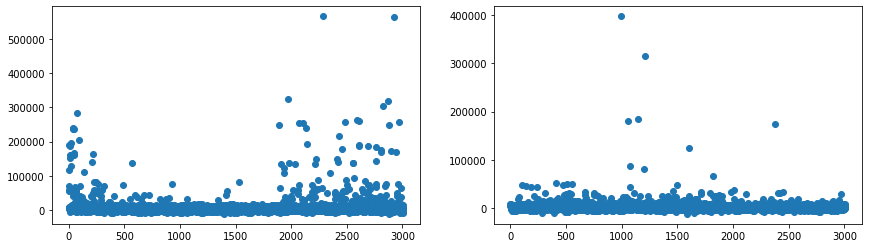

Montant_operation_crediteur_DAV_M - sk : 11.0 - kurt :172.0  | Montant_operation_crediteur_DAV_M1 - sk : 9.0 - kurt :97.0


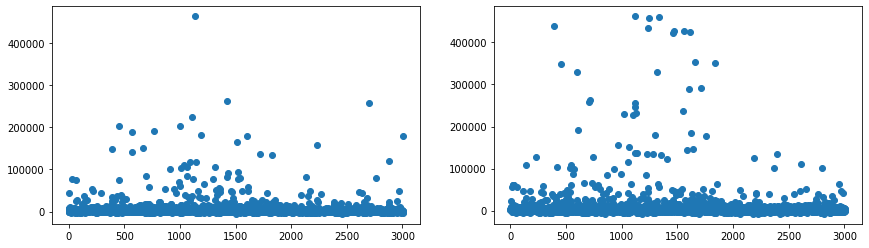

Montant_operation_debiteur_DAV_M - sk : 7.0 - kurt :51.0  | Montant_operation_debiteur_DAV_M1 - sk : 9.0 - kurt :97.0


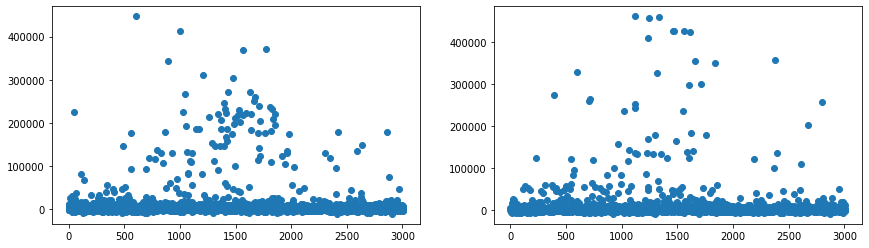

Montant_retrait_carte_M1 - sk : 8.0 - kurt :83.0  | Montant_retrait_carte_M - sk : 7.0 - kurt :53.0


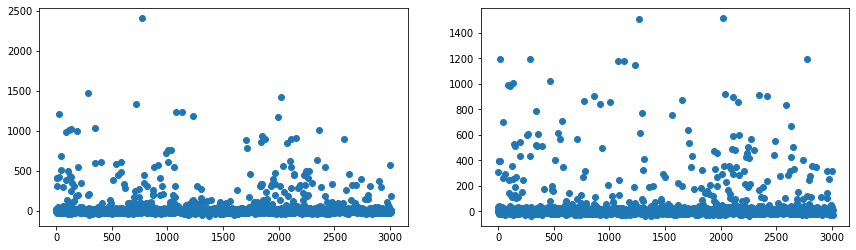

Nombre_retrait_carte_M1,1 - sk : 15.0 - kurt :294.0  | Nombre_retrait_carte_M1 - sk : 12.0 - kurt :201.0


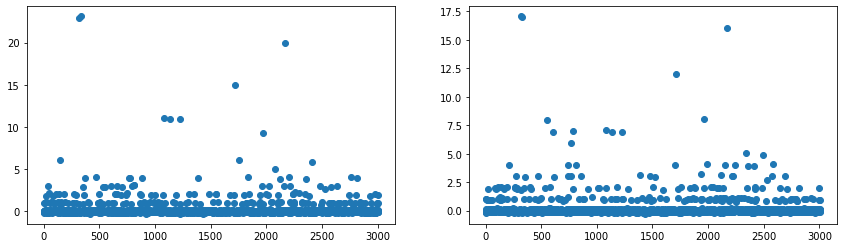

Nombre_connexion_appli_6M - sk : 6.0 - kurt :76.0  | Quantité_obligations - sk : 27.0 - kurt :873.0


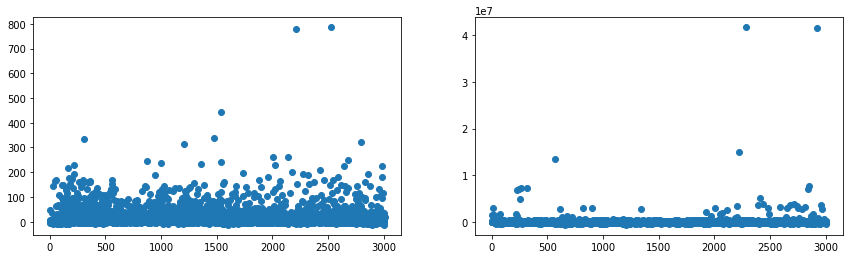

Nombre_connexion_site_6M - sk : 10.0 - kurt :184.0  | Nombre_de_connexion_appli_semaine_6M - sk : 9.0 - kurt :154.0


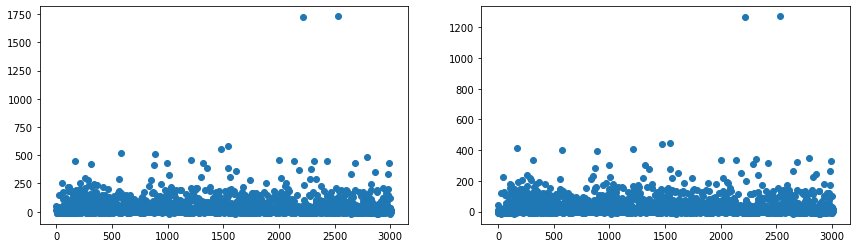

Montant_flux_crediteur_M - sk : 16.0 - kurt :287.0  | Duree_connexion_moyenne_6M - sk : 4.0 - kurt :31.0


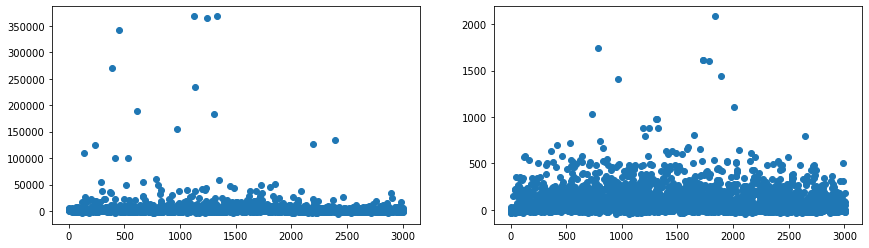

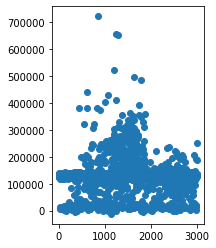

In [31]:
plot_skew_kurt(df1)

**Nous obtenons des résultats beaucoup plus cohérent pour les variables auxquelles ont enlevés les outliers** <br> 



### Quelques remarques sur le dataset

**Concernant nombres_adultes & age_2eme_personne :**

On peut remarquer 2 profils :

* Nb Adultes = 2 & Age_2eme personne $\in$ [20:80] :
    * Couple
* Nb Adultes = 1 & Age_2eme personne $\in$ [0:10] :
    * Famille monoparentale

  

## 1.3 - Encodage CSP

Il nous reste maintenant à encoder la colonne CSP, qui nous indique si la catégorie socio-professionelle des personnes étudiés. 
* CSP+ : Cat Socio Professionelle "Supérieure"
* CSP-: Cat Socio Professionelle "Inférieure"

In [32]:
df1.CSP[:5]

0    CSP+
1    CSP-
2    CSP+
3    CSP-
4    CSP+
Name: CSP, dtype: object

Pour ce faire nous allons renommer la colonne CSP -> CSP+ : 

* 1 - Si CSP +
* 0 - Si CSP -

In [33]:
csp_dict = {'CSP+':1,'CSP-':0,np.nan:np.nan} # Utilisation d'un dictionnaire pour un encodage rapide

df1['CSP'] = [csp_dict[csp_i]  for csp_i in df1['CSP']]

## 1.4 - Transformation Output

Comme nous avons pu le voir, output est un booléen en français qu'il faut donc transformer en anglais : 

* VRAI -> TRUE
* FAUX -> FALSE

In [34]:
df1.Output[:5]

0    FAUX
1    FAUX
2    FAUX
3    FAUX
4    FAUX
Name: Output, dtype: object

In [35]:
output_dict = {'FAUX':False,'VRAI':True,np.nan:np.nan}

In [36]:
df1['Output'] = [output_dict[output] for output in df1['Output']]

# 2. Analyse des données

Maintenant que nous avons chargés le dataset et reformaté les données qui se devaient d'être reformatées, nous allons pouvoir regarder : 
* Les features, valeurs, répartitions
* Output, répartitions

## 2.1 Analyse des features & output

In [37]:
df = df1.copy() # On sauvegarde sur df les changements réalisés précedemment

### Analyse des features

In [38]:
df.columns

Index(['ID', 'Nombres_adultes', 'Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value', 'ID_PP',
       'Encours_credit_habitat', 'Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1', 'CSP',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1',
       'Quantité_obligations', 'Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M', 'Montant_flux_crediteur_M',
       'Montant_pret_banque', 'Output'],
      dtype='object')

### Des "catégories dans les features" :

> On remarque que l'on peut classer les features selon leurs appartenances aux catégories suivantes

| Catégories | Informations globales <br> (Informations concernant la personne, age, nbr adultes, montant du crédit, crédit restant) | Opérations bancaires <br> (Ensemble des opérations effectuées sur le mois) | Extra financiers <br> (Informations sur le comportement de la personne, suivi de ses opérations bancaire) |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Features   | Nombre_adultes \| Nombre_personnes_foyer <br> Age_2e_personne \| Note_credit \| Montant_pret_banque <br> CSP ; Encours | Montant_operation_crediteur/debiteur <br> Nombre de retraits <br> Montant_flux_créditeur | Nombre_connexion_appli <br> Nombre_connexion_site <br> Durée de connexion moyenne |

**En regroupant selon ses catégories, l'analyse de corrélation sera plus pertinente**

In [39]:
### On construit ces catégories en accord avec le tableau ci-dessus
infos_globales_cols = ['Nombres_adultes', 'CSP','Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value',
       'Encours_credit_habitat','Montant_pret_banque']
operations_bancaires_cols = ['Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1','Montant_flux_crediteur_M','Quantité_obligations']
extra_financiers_cols = ['Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M']
"""Reorganisation des features_cols"""
features_cols = infos_globales_cols+operations_bancaires_cols+extra_financiers_cols

In [40]:
features = df[features_cols]

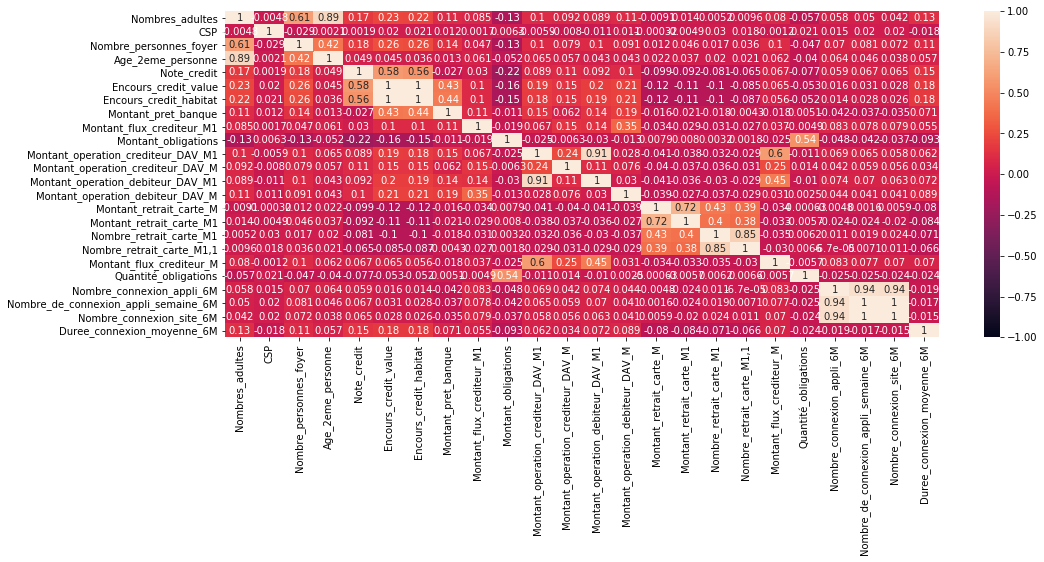

In [41]:
plt.figure(figsize=(16,6))
sns.heatmap(features.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

**Matrice de corrélation**

Ce regroupement par catégories nous permet d'identifier des matrices dans la matrice de corrélation : ce qui traduit le lien entre certaines variables d'une même catégorie.<br>
Certaines catégories sont (faiblement) corrélées entre elles : <br> 
* Informations globales -- Opérations globales

## Analyse de [Output]

### Sens output & lien avec les variables

**Les variables** : Comme nous l'avons vu précedemment, il est possible de regrouper les variables par catégories et celles-ci donnent des informations sur 3 composantes 
* *Informations globales* : Profil du client
* *Information bancaires* : Opérations réalisées par le client 
* *Information Extra-financières* : Assuidité, suivi des comptes bancaires
  
**Output** : 

Cette variable à prédire prend deux valeurs : *VRAI* ou *FAUX* : 
<br> 
Au des variables endogènes on peut supposer les choses suivantes sur Output : 

* Output peut caractériser le fait que le client en question soit en défaut de paiement sur son prêt 
    * Applications : Eviter de prêter de l'argent à des gens à risques
    
* Output peut caractériser le fait que le client en question soit au contraire un "bon client" ou non 
    * Appplications : Idenfifier plus facilement les bons profils

> Afin de mieux comprendre le sens de cette variable nous allons procéder à une exploration "simple" avec des regroupements en fonction de certaines variables

## Output & Informations globales

In [170]:
from sklearn.preprocessing import MinMaxScaler

In [229]:
def groupby_output(df,cols):
    """Permet de renvoyer la moyenne des variables pour chaque types de variables"""
    all_cols = cols +['Output']
    """Affichage des données (scale pour pouvoir tout afficher sur le même graphe)"""
    # Premier Df qui permet de mener une analyse qualitative en ayant le sens sur les variables
    df1 = df[all_cols].groupby('Output').mean()
    # Scale df et analyser le groupby
    X = df[cols].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_scaled = pd.concat([pd.DataFrame(X,columns=cols),pd.DataFrame(df['Output'])],axis=1)
    # Group df_scaled
    df2 = df_scaled[all_cols].groupby('Output').mean()
    scaled_cols = df2.columns
    df2.plot.bar()
    plt.legend(bbox_to_anchor=(1.5,0.5),loc='center right')
    plt.show()

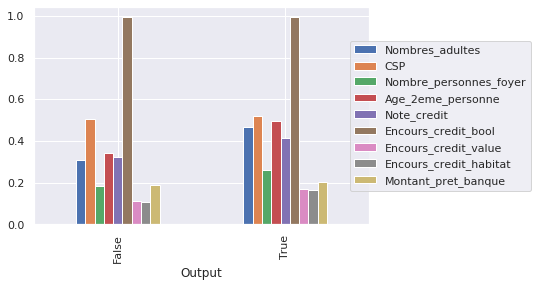

In [230]:
groupby_output(df,infos_globales_cols)
# groupby_output(infos_globales_cols)

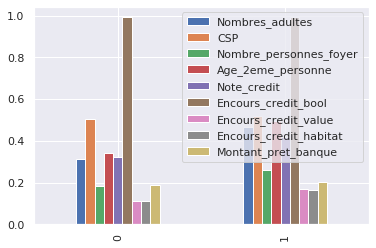

In [201]:
scg.plot.bar()

In [200]:
sns.barplot(x='Output',y=scg.iloc[:,1:].columns,data=scg)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [188]:
df2

NameError: name 'df2' is not defined

In [190]:
scg

,Output,Nombres_adultes,CSP,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_pret_banque
0,False,0.310875,0.506007,0.182893,0.341665,0.321089,0.992093,0.110619,0.109439,0.190090
1,True,0.467893,0.519856,0.259849,0.497586,0.416263,0.992762,0.168584,0.165962,0.201505


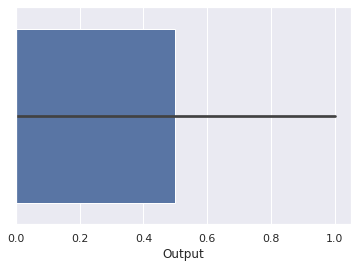

In [189]:
sns.barplot(x='Output',data=scg)

In [178]:
scaled

,Nombres_adultes,CSP,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_pret_banque,Output
0,0.555912,1.0,0.194855,1.000000,0.092311,1.0,0.049048,0.046894,0.185866,False
1,0.557449,0.0,0.211453,0.996764,0.076707,1.0,0.051340,0.052196,0.193550,False
2,0.496509,1.0,0.178095,0.995510,0.074645,1.0,0.033705,0.034150,0.194761,False
3,0.512024,0.0,0.174018,0.982775,0.062151,1.0,0.050769,0.050699,0.184993,False
4,0.533605,1.0,0.187965,0.967023,0.099255,1.0,0.038029,0.038020,0.189133,False
...,...,...,...,...,...,...,...,...,...,...
3003,0.004525,0.0,0.025891,0.032532,0.510062,1.0,0.099962,0.101300,0.190566,False
3004,0.020412,1.0,0.051635,0.031300,0.526933,1.0,0.163916,0.164868,0.191487,False
3005,0.000000,1.0,0.033012,0.000000,0.555163,1.0,0.143936,0.143346,0.194868,False
3006,0.062097,0.0,0.057216,NaN,0.058070,1.0,0.029873,0.030686,0.195480,False


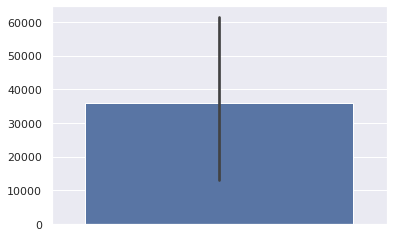

In [160]:
sns.barplot(y=infos_globales_output.columns[1:],hue='Output',data=infos_globales_output)

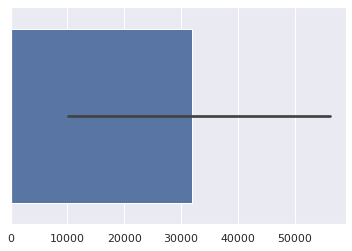

In [144]:
sns.barplot(infos_globales_output)

In [ ]:
sns.barplot(i)

**Lien entre informations globales et output**

O

In [44]:
df.groupby(['Output','CSP']).count()

ID  Nombres_adultes  Nombre_personnes_foyer  Age_2eme_personne  \
Output CSP                                                                     
False  0.0  1069             1064                    1063               1068   
       1.0  1095             1092                    1095               1095   
True   0.0   399              399                     397                398   
       1.0   432              430                     431                432   

            Note_credit  Encours_credit_bool  Encours_credit_value  ID_PP  \
Output CSP                                                                  
False  0.0         1068                 1062                  1052   1067   
       1.0         1094                 1085                  1078   1091   
True   0.0          397                  397                   393    399   
       1.0          431                  431                   429    431   

            Encours_credit_habitat  Montant_flux_crediteur_M1  ...  \
Output CSP                                                     ...   
False  0.0                    1069                       1066  ...   
       1.0                    1093                       1095  ...   
True   0.0                     397                        398  ...   
       1.0                     432                        432  ...   

            Montant_retrait_carte_M1  Nombre_retrait_carte_M1  \
Output CSP                                                      
False  0.0                      1068                     1067   
       1.0                      1091                     1093   
True   0.0                       398                      399   
       1.0                       431                      432   

            Nombre_retrait_carte_M1,1  Quantité_obligations  \
Output CSP                                                    
False  0.0                       1066                  1069   
       1.0                       1095                  1093   
True   0.0                        398                   395   
       1.0                        431                   432   

            Nombre_connexion_appli_6M  Nombre_de_connexion_appli_semaine_6M  \
Output CSP                                                                    
False  0.0                       1062                                  1060   
       1.0                       1087                                  1086   
True   0.0                        396                                   396   
       1.0                        429                                   432   

            Nombre_connexion_site_6M  Duree_connexion_moyenne_6M  \
Output CSP                                                         
False  0.0                      1062                        1064   
       1.0                      1087                        1093   
True   0.0                       396                         399   
       1.0                       432                         431   

            Montant_flux_crediteur_M  Montant_pret_banque  
Output CSP                                                 
False  0.0                      1067                 1066  
       1.0                      1092                 1093  
True   0.0                       398                  399  
       1.0                       432                  432  

[4 rows x 26 columns]

**Pour les modèles que nous allons établir à la suite, il est important de voir que Output est très déséquilibrée :**

* 2/3 False | 1/3 True

In [45]:
df_without_na = df.dropna().reset_index()

# 3. Analyse en Composante Principale

Au vu du nombre conséquent de variables, il me paraît pertinent de faire une ACP afin de réduire le nombre de variables à utiliser pour le modèle

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Calibrage du dataset 
* X : features 
* y : output

In [48]:
""" J'utilise un MinMaxScaler qui après analyse permet d'augmenter 
la variance expliquée sur les premieres composantes de l'ACP"""
scaler = MinMaxScaler()

In [49]:
# Chargement des features en array numpy et de l'output
X = df_without_na[features_cols].values
y = df_without_na['Output'].tolist()

In [50]:
X.shape

(2833, 25)

### Mise en place de l'ACP

In [51]:
# Calibrage de X
X = scaler.fit_transform(X)

In [53]:
# Chargement de l'ACP 
pca = PCA(random_state=0)

In [54]:
X = pca.fit_transform(X)

In [55]:
X.shape

(2833, 25)

### Analyse de l'ACP

In [56]:
def pca_plot(pca,X):
    # Visualisation de l'inertie en fonction du nombres de composantes
    fig,ax = plt.subplots(figsize=(14,5))
    sns.set(font_scale=1)

    plt.step(range(X.shape[1]),pca.explained_variance_ratio_.cumsum(),where='mid', label="Cumulative explained variance")
    sns.barplot(np.arange(1,X.shape[1]+1),pca.explained_variance_ratio_,alpha=0.5, color ="g",label='Individual explained variance')
    plt.xlim(0,10)
    plt.plot((0,10),(0.95,0.95),label='95% inertia')
    ax.set_xticklabels([s for s in ax.get_xticklabels()])

    plt.xlabel('Principal components')
    plt.ylabel('Explained variance')
    plt.legend()
    plt.show()

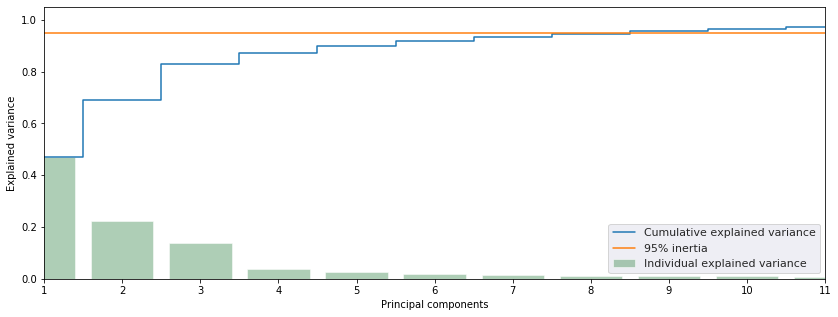

In [57]:
pca_plot(pca,X)

#### On peut garder uniquement les 8 premières composantes qui expliquent 95% de la variance

###  Visualisation de l'ACP

#### Construction d'un dataframe avec les 8 premières composantes de l'ACP


In [83]:
n_components_pca = 8
"""Création des colonnes du dataframe"""
pca_cols = [f'component_{i+1}' for i in range(n_components_pca)]+["Output"]
principal_components_df = pd.concat([pd.DataFrame(X[:,:n_components_pca]),pd.DataFrame(y)],axis=1)
principal_components_df.columns = pca_cols

In [84]:
principal_components_df

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Output
0,-0.489949,0.423969,-0.495675,-0.134843,0.141500,0.008301,0.011257,0.049214,False
1,0.510233,0.419502,-0.506829,-0.120444,0.152614,-0.015923,-0.014970,-0.004660,False
2,-0.489860,0.367815,-0.507707,-0.151804,0.151071,0.001616,-0.007266,-0.012203,False
3,0.509940,0.367437,-0.516255,-0.140519,0.140354,-0.030266,0.221051,-0.025652,False
4,-0.489712,0.381282,-0.485480,-0.144178,0.138696,0.002795,-0.013342,-0.018403,False
...,...,...,...,...,...,...,...,...,...
2828,0.515328,-0.472457,-0.122068,0.261925,-0.262879,0.036215,-0.060783,0.013847,False
2829,-0.489355,-0.459499,0.258215,-0.133894,-0.056697,0.004655,0.015882,0.003836,False
2830,0.510122,-0.456227,0.294969,-0.109794,0.004003,-0.011133,0.004092,-0.026908,False
2831,-0.490175,-0.419271,0.340515,-0.044570,0.015761,-0.016746,0.008686,-0.015737,False


### Pair plot

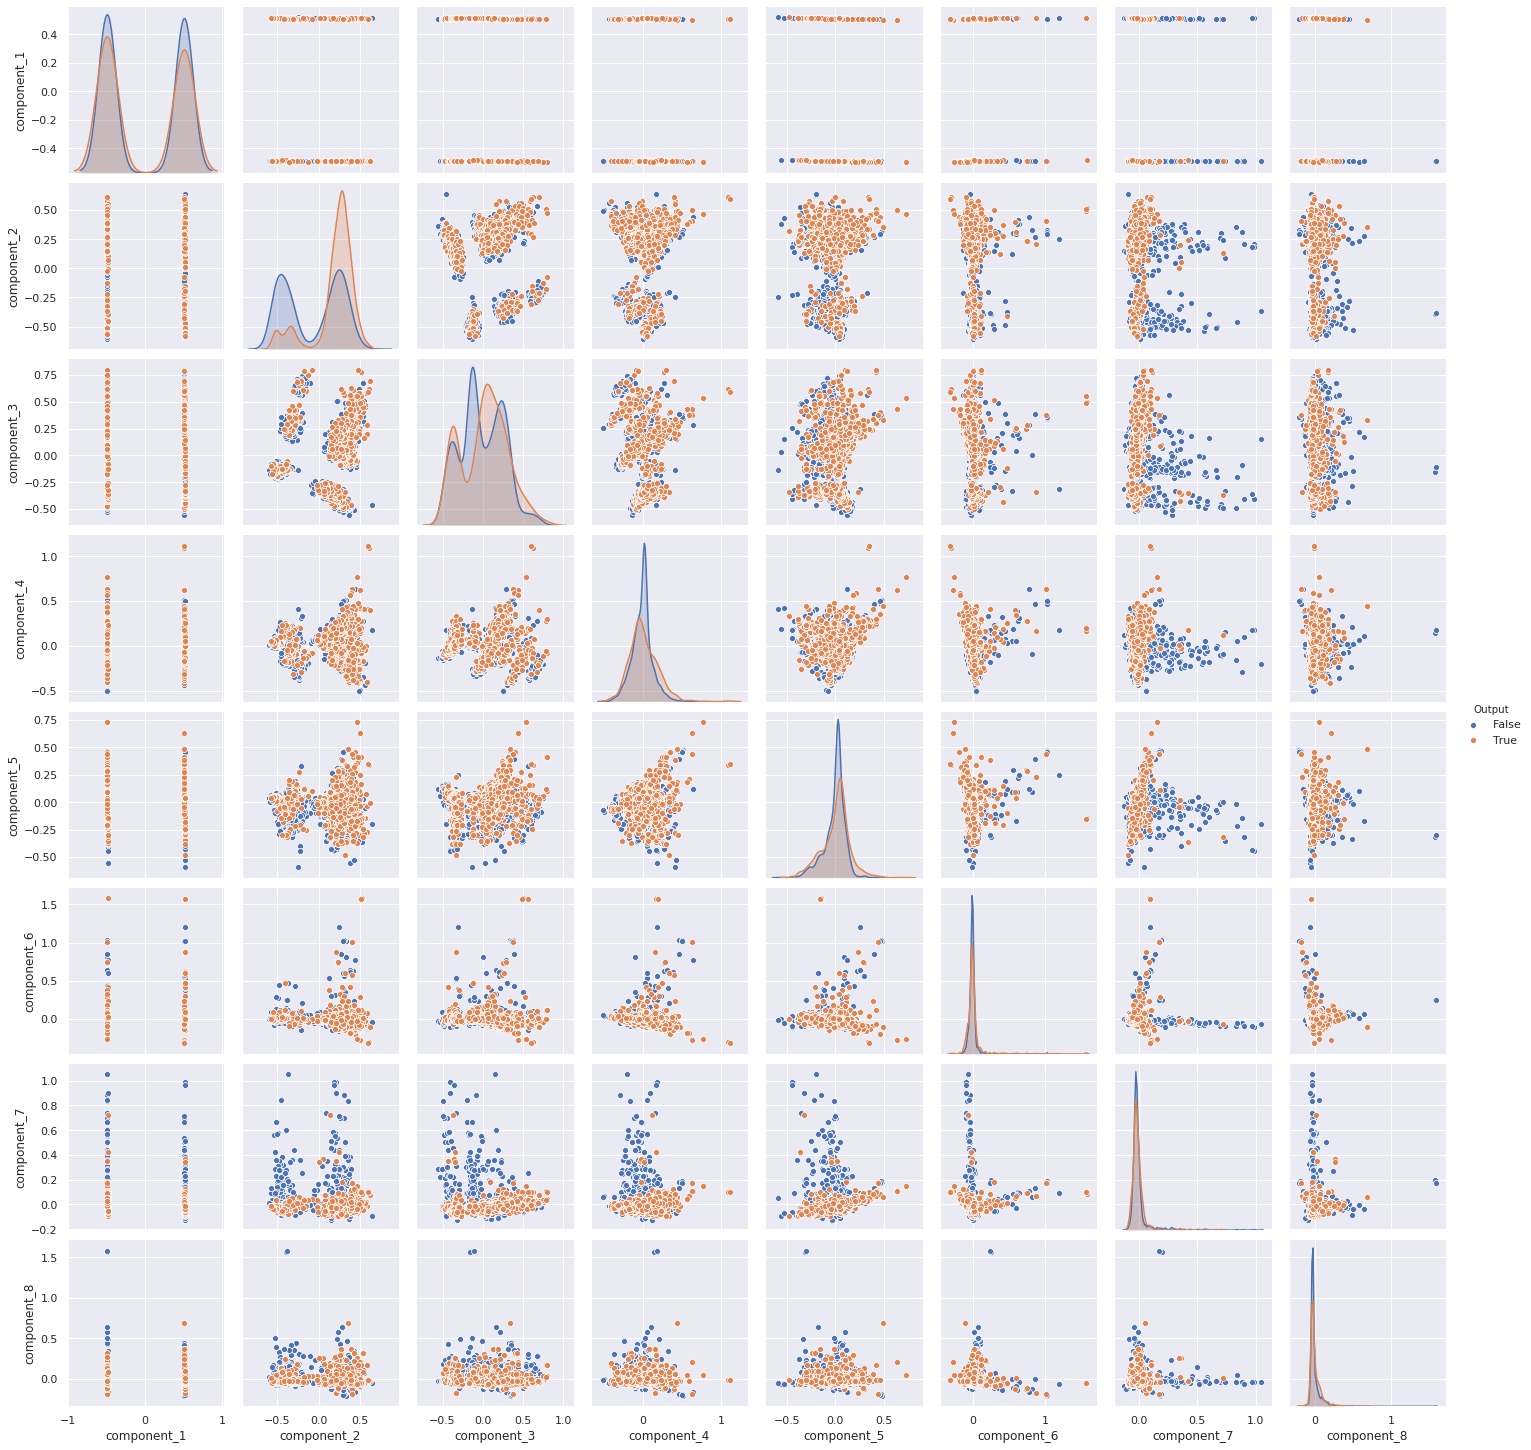

In [85]:
"""Visualisation des plans factoriels de l'ACP"""
sns.pairplot(principal_components_df,hue='Output')
plt.show()

# Choix des modèles

### Quelques remarques - Méthodes de classification

**Le dataset**

Sur ce problème d'apprentissage supervisé (i.e nous connaissons l'output pour chaque données et nous souhaitons construire un modèle pour de nouvelles données) auxquels nous avons affaire, 

## 2.2.1 - Classification avec un SVC : Support Vector Classifior



In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

# Initialisation du model

model = SVC()

# Hyperparamètres
search_space = {'kernel':['linear','poly','rbf'],'C':uniform(0,10)}

# Random Search
search = RandomizedSearchCV(model,search_space, n_jobs=-1,scoring='r2', cv = 5,n_iter = 20)

In [113]:
y1 =[1 if i else 0 for i in y]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y1)

In [116]:
search.fit(X_train,np.array(y_train))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36be7d8710>,
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=0)

In [117]:
search.best_params_

{'C': 9.4269230990001, 'kernel': 'rbf'}

In [119]:
best_svc = search.best_estimator_

In [120]:
best_svc.fit(X_train,y_train)

SVC(C=9.4269230990001, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [122]:
ypred = best_svc.predict(X_test)

In [131]:
accuracy_score(y_pred=ypred,y_true=y_test)

0.7743300423131171

## Random forest with the pca value

In [163]:
Xpca = X

In [164]:
X = Xpca[:,:12]

In [165]:
# Création du random forest
rfc = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Training du rf 
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)

In [166]:
cross_validation(rfc,X,y)

0.7978243749709928

In [126]:
X.shape

(2833, 25)

In [113]:
main_components_df = pd.DataFrame(Xpca[:,:8])

In [127]:
true_output_ids = df_without_na[df_without_na.Output==True].index
false_output_ids = df_without_na[df_without_na.Output==False].index

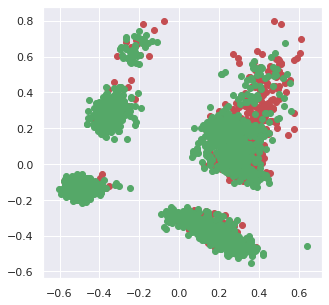

In [131]:
plt.figure(figsize=(5,5))
plt.scatter(X[true_output_ids,1],X[true_output_ids,2],c='r')
plt.scatter(X[false_output_ids,1],X[false_output_ids,2],c='g')

## Tuning Random Forest

In [167]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [168]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [171]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.1min finished


CPU times: user 11.4 s, sys: 128 ms, total: 11.5 s
Wall time: 13min 15s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [172]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [173]:
best_classifier = rf_random.best_estimator_

In [175]:
best_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
ypred =best_classifier.predict(X_test)

In [178]:
accuracy_score(ypred,y_test)

0.765867418899859

# 3. Modélisation - Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 3.1. Premier modèle

In [642]:
def random_forest_model(df_without_na,features_cols):
    """A partir d'un dataframe sans NaN et d'une liste de features, met en place un random forest
    et renvoie le model & l'accuracy score    """
    X = df_without_na[features_cols].values #Features
    y = df_without_na['Output'].tolist() # Target
    # Création du random forest
    rfc = RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    # Training du rf 
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    return(rfc,accuracy,X,y)

In [647]:
rfc,accuracy,X,y = random_forest_model(df_without_na,features_cols)
print('Accuracy :',round(accuracy,3))

Accuracy : 0.735


### Grande variation de l'accuracy car output est déséquilibré

> On se rend compte qu'en menant plusieurs prédiction, l'accuracy varie énormément, et ce car output n'est pas déséquilibré.

In [655]:
def plot_accuracy(model,X,y,nb_test = 30):
    """Permet d'afficher l'accuracy du model pour nb_test simulation"""
    accuracy = [0]*nb_test
    for i in range(nb_test):
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy[i] = accuracy_score(y_pred,y_test)  
    plt.figure(figsize=(5,5))
    plt.plot(range(nb_test),accuracy,label='Accuracy')
    plt.plot((0,nb_test),(np.mean(accuracy),np.mean(accuracy)),label='Mean Accuracy')
    plt.xlabel('Itération i')
    plt.ylabel('Accuracy')
    plt.title('Accuracy à chaque itération')
    plt.legend()
    plt.show()
    print('Moyenne :',round(np.mean(accuracy),3))
    return(accuracy)

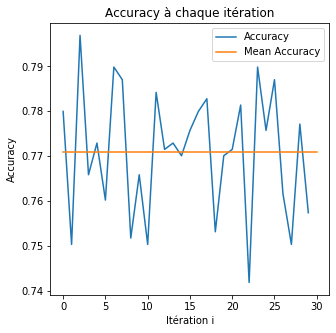

Moyenne : 0.7708509637987776


In [653]:
accuracy = plot_accuracy(rfc,X,y)

## 3.2 - Random Forest & Cross Validation

> Afin de mieux se rendre compte de la performance de notre modèle, nous allons recourir à la validation croisée.

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [678]:
def cross_validation(rfc,X,y):
    """k fold-cross validation
    On divise en 10 notre dataset et on va évaluer la performance de notre modèke avec la métrique :
    ROC_AUC :
    * ROC : Reveicer Operating Characteristic - Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs

    * AUC : Area Under Curve 

    La métrique ROC_AUC mesure ainsi la qualité de classement du modèle
    """
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores = cross_val_score(rfc,X,y,scoring='roc_auc',cv=cv)
    accuracy = np.mean(scores)
    return(accuracy)

In [658]:
cross_validation(rfc,X,y)

Mean : 0.8064929666422501


#### Soit une performance de 80% : 
* On retrouve ce que l'on voit sur le graphique de la partie 3.1

## 3.3 Améliorer le modèle

### 3.3.1. Enlever les features redondantes

In [602]:
correlated_features = features.corr()[(abs(features.corr())>0.7)&(abs(features.corr())<1)].reset_index()
correlated_features.head()

,index,Nombres_adultes,CSP,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_value,Encours_credit_habitat,Montant_pret_banque,Montant_flux_crediteur_M1,...,Montant_retrait_carte_M,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Montant_flux_crediteur_M,Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M
0,Nombres_adultes,NaN,NaN,NaN,0.892363,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nombre_personnes_foyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Age_2eme_personne,0.892363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Note_credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Selectionner les couples redondants

> On souhaite pouvoir se séparer de certaines variables afin d'améliorer la précision du modèle. Pour cela on va noter pour un variable V1 toutes les variables V2 qui lui sont fortement corrélées (>0.7). Pour ensuite entraîner notre random forest avec moins de variables. 
<br> 
On aurait par exemple : 

| V1              | V2                | Correlation |
| --------------- | ----------------- | ----------- |
| Nombres_adultes | Age_2eme_personne | 0.89263     |



In [631]:
def create_correlation_tab(features,corr_threshold = 0.7):
    """Permet de créer le tableau ci-dessus, prends le dataframe des features et le seuil de corrélation
    Seuil à 0.7 -> On enlèvere une des deux composantes d'un couple corrélé >=0.7"""
    correlated_features = features.corr()[(abs(features.corr())>=corr_threshold)&(abs(features.corr())<1)].reset_index()
    V1 = []
    V2 = []
    correlation_v1_v2 = []
    correlation_cols = correlated_features.columns[1:]
    """On va parcourir le tableau et sélectionner la valeur de corrélation pour un couple donné, quand celle-ci n'est pas un N"""
    for row in correlation_cols:
        for col in correlation_cols :
            corr_value = correlated_features[(correlated_features['index'] == row)][col].values[0]
            if not math.isnan(corr_value):
                V1.append(row)
                V2.append(col)
                correlation_v1_v2.append(corr_value)

    """Construction du dataframe comme présenté ci-dessus"""
    correlation_tab = pd.DataFrame(zip(V1,V2,correlation_v1_v2),columns=['V1','V2','Correlation'])
    """On va obtenir deux fois un couple de variables qui respectent les conditions, il faut donc enlever celui-ci"""
    correlation_tab = correlation_tab.drop_duplicates('Correlation').reset_index(drop=True)
    return(correlation_tab)

In [666]:
correlation_tab = create_correlation_tab(features,corr_threshold=0.8)
correlation_tab.head()

,V1,V2,Correlation
0,Nombres_adultes,Age_2eme_personne,0.892363
1,Encours_credit_value,Encours_credit_habitat,0.998136
2,Montant_operation_crediteur_DAV_M1,Montant_operation_debiteur_DAV_M1,0.912282
3,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",0.852223
4,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,0.943009


#### Enlever les couples redondants

* On met de côté les features présentes dans la colonne V2 de notre df

In [633]:
def remove_redondant_cols(features_cols,correlation_tab):
    """Enleve les features redondantes de la liste des features"""
    redondant_cols = correlation_tab.V2.unique().tolist()
    new_features_cols= [feature for feature in features_cols if feature not in redondant_cols]
    return(new_features_cols)

#### On créé la nouvelle liste de features

In [667]:
new_features_cols = remove_redondant_cols(features_cols,correlation_tab)

In [668]:
print(f'Passage de {len(features_cols)} Features à {len(new_features_cols)} Features')

Passage de 25 Features à 19 Features


## 3.3.2 - Retravailler le modèle avec moins de features

In [669]:
rfc,accuracy,X,y = random_forest_model(df_without_na,new_features_cols)
print('Accuracy :',round(accuracy,3))

Accuracy : 0.757


In [671]:
cross_validation(rfc,X,y)

Mean : 0.777697193000644


#### Trouver le nombre optimal de features à enlever

In [708]:
corr_thresholds = np.linspace(0.6,0.99,10)
accuracy = [0]*len(corr_thresholds)
nb_features =[0]*len(corr_thresholds)

In [709]:
%%time
for (i,corr_threshold) in enumerate(corr_thresholds):
    correlation_tab = create_correlation_tab(features,corr_threshold=corr_threshold)
    new_features_cols = remove_redondant_cols(features_cols,correlation_tab)
    nb_features[i] = len(new_features_cols)
    rfc,accu,X,y = random_forest_model(df_without_na,new_features_cols)
    accuracy[i] = cross_validation(rfc,X,y)

CPU times: user 4min, sys: 217 ms, total: 4min
Wall time: 4min


#### Afficher le seuil de corrélation optimal & le nombre de features optimal

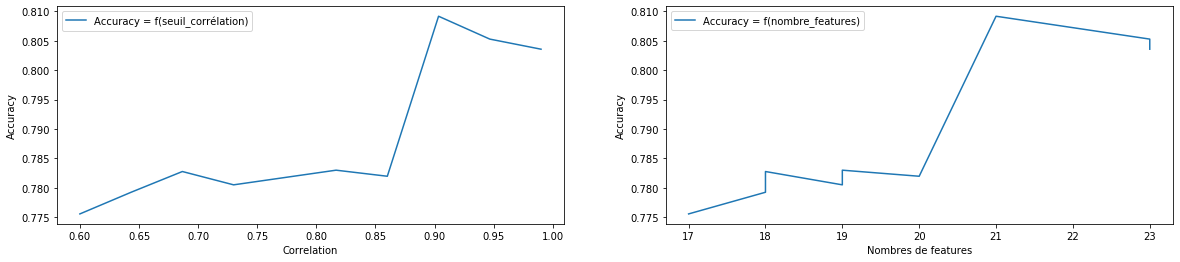

In [710]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
ax1.plot(corr_thresholds,accuracy,label="Accuracy = f(seuil_corrélation)")
plt.xlabel("Correlation")
plt.ylabel("Accuracy")
plt.legend()
ax2 = f.add_subplot(122)
ax2.plot(nb_features,accuracy,label="Accuracy = f(nombre_features)")
plt.xlabel("Nombres de features")
plt.ylabel("Accuracy")
f.subplots_adjust()
plt.legend()

plt.show()

#### Moins de features pour une meilleure précision

On constate donc ici qu'il va être intéréssant d'enlever les variables qui sont trop corrélées entre elles pour obtenir une meilleure précision sur notre modèle

### Pistes 

* Random forest grid search : tuning hyperparameters
* Logistic regression ? 
* KMEANS ?
* 

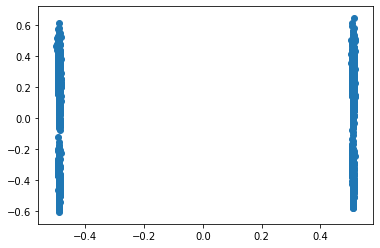

In [601]:
## PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=2)
X = df_without_na[features_cols].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pca.fit_transform(X)
plt.scatter(X[:,0],X[:,1])
plt.show()